<a href="https://colab.research.google.com/github/Frikasong/CS61Aassignment/blob/main/Module4_Assignment_w26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Assignment

### Instructions

You should begin by viewing Lesson 4 on eClass (and note that the lesson includes a link to the notebook used in the videos).

Next, everyone should attempt to complete the beginner and intermediate sections of this assignment. If you are interested you can continue to advanced. Whether you choose to go beyond the beginner and intermediate sections will not affect your participation grade, but some of the skills you learn (or relearn) may be helpful for your final project for the course.

In addition, everyone should complete the sections marked as for "Everyone".

Combined, the lesson and assignment should not take you more than three hours -- so if you get to that point, just move on to the "Everyone" sections (and add a text/markdown cell to the notebook indicating where you stopped and saying that you hit the 3 hour limit).

When you have finished, upload a copy of the .ipynb file to eClass assignment page.

NOTE: If you are using Colab and you downloaded this file by clicking a link, make sure to save a copy of this file on your Google Drive by selecting File, Save.

### Everyone (if you are using OpenAI):

Log into the OpenAI [platform](https://platform.openai.com/).

Click on "Billing". Ensure that you have a positive balance (add $5 if you do not -- and recall that if that poses a barrier for you, please request a grant from the Refugee Law Lab). Then, confirm that auto recharge is set to off.

Next, click on "Limits". Add a budget (e.g. $5) and an email altert. In addition to setting the budget limits, the same page will also show you the rate limits that apply to your account. These will show you: which models you have access to, the number of tokens that you are allowed to send per minute, and the number of requests that you are able to send per minute. The consequence of going beyond the rate limits is just that the system will respond with an error message.

You can find additional information about pricing [here](https://openai.com/api/pricing/) and about rate limits [here](https://platform.openai.com/docs/guides/rate-limits). Note that the API does not have a monthly fee. You only pay for usage. The assignment for this module can be completed for (far) less than the $5 minimum credits.

Once you have confirmed that you have set budget limits and auto recharge is off, indicate that in the markup cell below.

I have set budget limit as $5 and auto recharge is off.

### Beginner Question 1

Go to OpenAI's platform (log in and select API) here:

https://platform.openai.com/playground

Select responses mode.

Try asking the system a legal question that arises from one of your other courses. See how the answer compares using different models. See if anything changes when you change the system message. See if anything changes when you change other parameters.

Based on this experimentation, if you wanted to use the system to help answer questions from your courses, what settings and system message would you use and why?

I choose to use gpt4.1-mini or nano, after balancing the price and output. I have tested gpt 5.2, 5.2nano, and gpt 4.1, 4.1 mini, and nano, with same question: give me the leading cases in distinguishing ABI and AAII in ITA under Canadian Tax Law, 5.2 nano fails to comprehend the abbreviation, while the 4.1 models have a great response overall, and 4.1 nano is the most cost efficient.

### Beginner Question 2

Using the best settings you were able to come up with in the playground select one example of a legal question and use Python to:

(a) print the number of input tokens in the example

(b) calculate and print the cost of sending those input tokens to the OpenAI api

(c) send the example (using the settings that you used in the playground for Beginner Question 2) to the OpenAI api and print the result

In [ ]:
!pip install openai
!pip install --upgrade tiktoken

import openai
from openai import OpenAI
import tiktoken

from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')

client = OpenAI()
MODEL = "gpt-4.1-nano"
TEMPERATURE = 0.7
MAX_TOKENS = 500

LEGAL_QUESTION = """You are a helpful legal assistant. Answer the following question:

What are the key elements required to establish a valid contract under common law?
Please provide a brief overview of each element."""

# --- (a) Count and print input tokens ---

def count_tokens(text, model):
    encoding = tiktoken.get_encoding("o200k_base")
    num_tokens = len(encoding.encode(text))
    return num_tokens
num_input_tokens = count_tokens(LEGAL_QUESTION, MODEL)

print(f"[a] Number of input tokens: {num_input_tokens}")

# --- (b) Calculate and print the cost of input tokens ---
# Pricing (as of Feb 2026)
# gpt-4.1 nano is 0.10 USD for 1M input tokens
INPUT_COST_PER_1M = 0.10  # USD

cost = (num_input_tokens / 1_000_000) * INPUT_COST_PER_1M
print(f"[b] Estimated input cost: ${cost:.6f} USD")
print(f"    (Based on ${INPUT_COST_PER_1M}/1M tokens for {MODEL})")

# --- (c) Send to OpenAI API and print the result ---
response = openai.chat.completions.create(
    model=MODEL,
    messages=[{"role": "user", "content": LEGAL_QUESTION}],
    temperature=TEMPERATURE,
    max_tokens=MAX_TOKENS,
)
print(f"\n[c] API Response:\n{'-'*50}")
print(response.choices[0].message.content)
print(f"{'-'*50}")

[a] Number of input tokens: 37
[b] Estimated input cost: $0.000004 USD
    (Based on $0.1/1M tokens for gpt-4.1-nano)

[c] API Response:
--------------------------------------------------
Under common law, the key elements required to establish a valid contract are as follows:

1. **Offer**: One party must present a clear and definite proposal to enter into an agreement, indicating their willingness to be bound by specific terms.

2. **Acceptance**: The other party must agree to the terms of the offer unequivocally and unequivocally, signifying their consent to be bound by those terms.

3. **Consideration**: There must be something of value exchanged between the parties—such as money, goods, services, or a promise—to demonstrate mutual intent and create a binding obligation.

4. **Mutual Intent to Contract (Meeting of the Minds)**: Both parties must have a shared understanding and agreement on the essential terms and the nature of the contract.

5. **Legal Capacity**: The parties invol

### Beginner Question 3

Choose a Supreme Court of Canada case that you read for a class recently.

Load the A2AJ Hugging Face Dataset for the Supreme Court.

Extract the text of the case from that dataset.

Using the OpenAI API and the text of the case, ask generative AI to prepare a case brief for a law student taking the specific course that you read the case for, using the best system / user message and parameters that you're able to craft.

Print out the name of the case, the citation, and the generative AI case brief.

How does the case brief compare to one that you might write?

In [ ]:
!pip install datasets
!pip install requests
import pandas as pd
from datasets import load_dataset
import openai

# --- Config ---
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')
MODEL = "gpt-4.1-nano"
TEMPERATURE = 0.3  # Lower temp for structured legal output
MAX_TOKENS = 2000

# --- Step 1: Pick your case ---

CASE_NAME = "Deans Knight Income Corp. v. Canada"

# --- Step 2: Load the A2AJ Supreme Court dataset ---
dataset = load_dataset("a2aj/canadian-case-law",data_dir = "SCC", split="train")


# --- Step 3: Find and extract the case text ---
matched = None
for example in dataset:
    if example["name_en"] and CASE_NAME.lower() in example["name_en"].lower():
        matched = example
        break

if matched is None:
    print("Case not found in dataset. Check the case name.")
    raise SystemExit

case_text = matched["unofficial_text_en"]
case_citation = matched.get("citation_en", "Citation not available")
print(f"Found: {matched['name_en']}")
print(f"Citation: {case_citation}")
print(f"Text length: {len(case_text)} characters\n")

# --- Step 4: Truncate if needed (API has token limits) ---
MAX_CASE_CHARS = 30000
if len(case_text) > MAX_CASE_CHARS:
    case_text_trimmed = case_text[:MAX_CASE_CHARS]
    print(f"[Note] Case text truncated to {MAX_CASE_CHARS} chars for API.")
else:
    case_text_trimmed = case_text

# --- Step 5: Build system + user prompts and call API ---
COURSE = "Tax for Enterprises"

system_prompt = f"""You are an expert legal research assistant helping a second-year law student
at Osgoode Hall Law School. The student is taking {COURSE}.
Your task is to prepare a clear, well-structured case brief suitable for that course.

The case brief should include:
1. Case Name and Citation
2. Facts (concise summary of the relevant facts)
3. Issue(s) (the key legal question(s) before the court)
4. Holding (the court's decision)
5. Reasoning (the court's rationale, focusing on aspects relevant to {COURSE})
6. Significance (why this case matters in the context of {COURSE})

Be precise, analytical, and concise. Write for a law student who has already read the case."""

user_prompt = f"""Please prepare a case brief for the following Supreme Court of Canada decision.

Case Name: {matched['name_en']}
Citation: {case_citation}

Case Text:
{case_text_trimmed}"""

response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt},
    ],
    temperature=TEMPERATURE,
    max_tokens=MAX_TOKENS,
)

# --- Step 6: Print results ---
print(f"\n{'='*60}")
print(f"CASE NAME: {matched['name_en']}")
print(f"CITATION:  {case_citation}")
print(f"{'='*60}\n")
print("AI-GENERATED CASE BRIEF:")
print('-'*60)
print(response.choices[0].message.content)
print('-'*60)

Found: Deans Knight Income Corp. v. Canada
Citation: 2023 SCC 16
Text length: 200522 characters

[Note] Case text truncated to 30000 chars for API.

CASE NAME: Deans Knight Income Corp. v. Canada
CITATION:  2023 SCC 16

AI-GENERATED CASE BRIEF:
------------------------------------------------------------
**Case Brief: Deans Knight Income Corp. v. Canada, 2023 SCC 16**

---

### 1. Case Name and Citation
**Deans Knight Income Corp. v. Canada**, 2023 SCC 16

### 2. Facts
Deans Knight Income Corporation (formerly Forbes Medi-Tech Inc.) had approximately $90 million in unused non-capital losses, research expenditures, and investment tax credits but lacked sufficient income to utilize these losses. To access these tax attributes, it entered into a complex series of transactions involving a venture capital firm, Matco, including asset transfers, a convertible debenture, and a planned IPO. These transactions effectively transformed Deans Knight into a new entity with a different business, ass

### Intermediate Question 1

The Ontario Ministry of Labour maintains a database of collective agreements: https://ws.lr.labour.gov.on.ca/CA/doc

Find 5 recent collective agreements.

For each collective agreement, print out the name of parties to the collective agreement and a generative AI summary of pay increases.



In [ ]:
import openai
import pandas as pd
import io
import urllib.request

# --- Config ---
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')
MODEL = "gpt-4.1-nano"
TEMPERATURE = 0.3
MAX_TOKENS = 500

# --- Load CSV ---
df = pd.read_csv("agreements_listing.csv", encoding="latin-1", low_memory=False)

# --- Step 1: Get 5 most recent agreements by start date ---
df["Agreement Start Date"] = pd.to_datetime(df["Agreement Start Date"], errors="coerce")
recent = df.dropna(subset=["Agreement Start Date"]).sort_values(
    "Agreement Start Date", ascending=False
).head(5).reset_index(drop=True)

print("5 Most Recent Agreements:\n")
print(recent[["Employer", "Union", "Agreement Start Date", "Agreement Expiry Date", "Name"]])
print()

# --- Step 2: For each, ask OpenAI to summarize pay increases ---
# NOTE: The CSV only has metadata, not the full agreement text.
# So we tell the model what we know and ask it to summarize
# what pay increases would typically look like for that type of agreement.

for i, row in recent.iterrows():
    employer = row["Employer"]
    union = row["Union"]
    start = row["Agreement Start Date"].strftime("%Y-%m-%d")
    expiry = row["Agreement Expiry Date"] if pd.notna(row["Agreement Expiry Date"]) else "N/A"
    pdf_name = row["Name"]

    prompt = f"""The following is a collective agreement filed with the Ontario Ministry of Labour:

Employer: {employer}
Union: {union}
Agreement Start Date: {start}
Agreement Expiry Date: {expiry}
PDF Filename: {pdf_name}

Based on typical collective agreements between these types of parties in Ontario for this time period,
summarize what pay increases (e.g. annual percentage increases, lump sums, step increases)
would commonly be included. Be clear that this is an inference based on the agreement metadata,
not the full text of the agreement."""

    response = openai.chat.completions.create(
        model=MODEL,
        messages=[{"role": "user", "content": prompt}],
        temperature=TEMPERATURE,
        max_tokens=MAX_TOKENS,
    )

    print(f"{'='*60}")
    print(f"Agreement {i+1}: {pdf_name}")
    print(f"  Employer: {employer}")
    print(f"  Union:    {union}")
    print(f"  Period:   {start} to {expiry}")
    print(f"{'-'*60}")
    print(f"AI Summary of Pay Increases:")
    print(response.choices[0].message.content)
    print()

5 Most Recent Agreements:

                                        Employer  \
0  Corporation Of The Municipality Of Leamington   
1                    Cambridge Memorial Hospital   
2                     Listowel Memorial Hospital   
3       Lennox-Addington County General Hospital   
4       Lennox-Addington County General Hospital   

                                               Union Agreement Start Date  \
0  Canadian Union Of Public Employees And Its Loc...           2026-01-01   
1  Service Employees International Union, Local 1...           2026-01-01   
2  Service Employees International Union, Local 1...           2026-01-01   
3  Service Employees International Union, Local 1...           2026-01-01   
4  Service Employees International Union, Local 1...           2026-01-01   

  Agreement Expiry Date                      Name  
0            2028-12-31                185807.pdf  
1            2028-12-31  185864 - 199926 - AA.pdf  
2            2028-12-31  185864 - 199939 

### Intermediate Question 2

Using the dataset with SCC judge bios that can be loaded using the code below, use gernative ai to extract the judges' province of origin (if in bio), put the results in the dataframe, and print a bar chart with the number of judges per province.

HINT: To reduce cost and increase speed, use a smaller model like gpt 5 nano, use low reasoning, and test on a small subsets of the dataframe to ensure it is working properly before you run it on all the judges.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json"
df = pd.read_json(url)
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
import openai
import matplotlib.pyplot as plt

#config
from google.colab import userdata
import os
import openai

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')
openai.api_key = os.environ["OPENAI_API_KEY"]
MODEL = "gpt-4.1-nano"
TEMPERATURE = 0.0
MAX_TOKENS = 20  # only need a province name back

# --- Step 1: Test on first 3 judges ---
def extract_province(bio):
    if pd.isna(bio) or bio.strip() == "":
        return "Unknown"
    response = openai.chat.completions.create(
        model=MODEL,
        messages=[{
            "role": "system",
            "content": "Read this bio carefully. Find where the judge was BORN or originally FROM — not where they studied, practised, or were appointed. Return ONLY the province/territory name (e.g. 'Nova Scotia', 'Quebec'). If they were born outside Canada, return the country (e.g. 'England'). If birthplace is not mentioned anywhere in the bio, return 'Unknown'."
        }, {
            "role": "user",
            "content": bio
        }],
        temperature=TEMPERATURE,
        max_tokens=MAX_TOKENS,
    )
    return response.choices[0].message.content.strip()

# Test on 3
test = df.head(3).copy()
test["Province"] = test["bio"].apply(extract_province)
print("--- TEST RESULTS ---")
print(test[["Names of Judges", "Province"]].to_string())


--- TEST RESULTS ---
                      Names of Judges     Province
0  The Hon. William Johnstone Ritchie  Nova Scotia
1        The Hon. Samuel Henry Strong      England
2     The Hon. Jean-Thomas Taschereau       Quebec


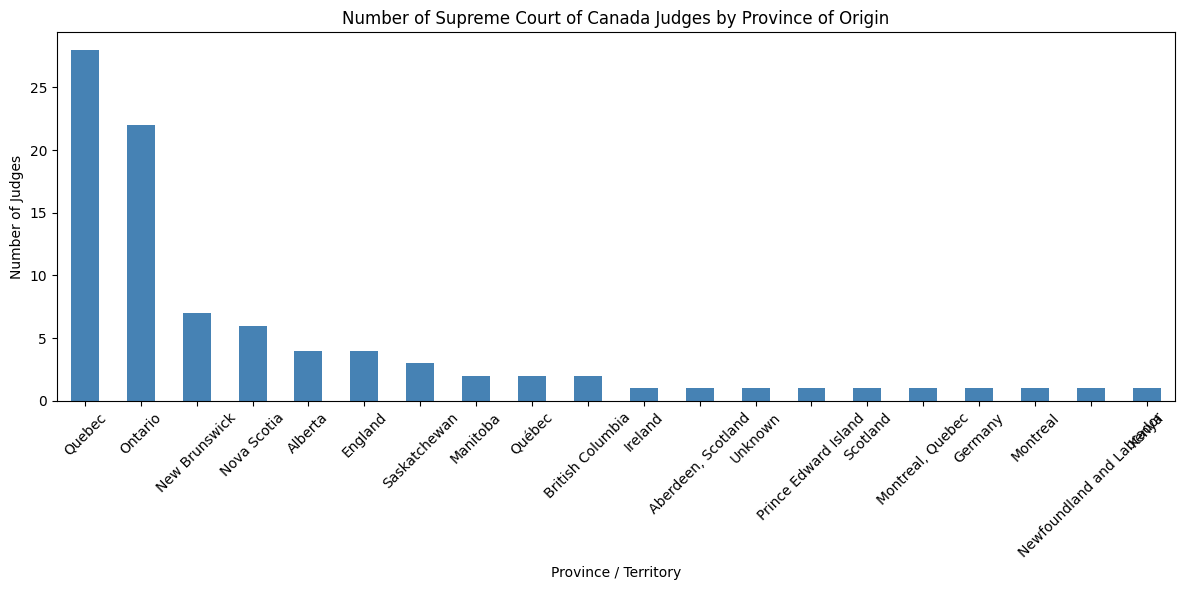

In [ ]:
# --- Run on all judges ---
df["Province"] = df["bio"].apply(extract_province)

# --- Bar chart ---
province_counts = df["Province"].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
province_counts.plot(kind="bar", ax=ax, color="steelblue")
ax.set_title("Number of Supreme Court of Canada Judges by Province of Origin")
ax.set_xlabel("Province / Territory")
ax.set_ylabel("Number of Judges")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

### Advanced Question 1

[Legal Bench](https://hazyresearch.stanford.edu/legalbench/) is a project by several legal academics and computer scientists to create datasets and benchmarks for legal tasks completed by generative AI systems.

One of the [tasks](https://hazyresearch.stanford.edu/legalbench/tasks/canada_tax_court_outcomes.html) involves categorizing outcomes from the text of Tax Court of Canada decisions.

Using the best prompts and parameters that you're able to craft, test the accuracy of an OpenAI model (use a relatively small and cheap model) on 50 examples from that task.

What accuracy rates do you get?


### Everyone Question:

Comment on something that you found interesting or challenging in completing this assignment.

The prompt engineering for the province extraction was the most interesting part. The first version of the system prompt just said "extract the province of origin," and the model confidently returned wrong answers, it was pulling provinces associated with the judge's career rather than their birthplace. It didn't flag any uncertainty, it just gave a plausible-sounding but incorrect answer.

That's a good illustration of a real problem with using LLMs for structured data extraction: they'll fill in an answer even when the information requires careful reading to distinguish between, say, "born in Nova Scotia" and "appointed to a court in New Brunswick." The fix was being much more explicit in the prompt, telling the model specifically what *not* to extract (where they studied, practised, or were appointed) and what *to* look for (where they were born or originally from). That kind of precision in the system prompt matters a lot more than people expect.


